

```

*   A multiple regression analysis.  
Your target variable is "total". Your predictor variables are all
other variables other than the state abbreviation.
*  You have decided to only include variables if you are at least 95%
confident that they are significant, i.e. not just based on sampling error.  
If you eliminate any, show that code that eliminates them, and then add code
to re-run your regression.
*  Develop three visualizations that "tell the story" of your data.



```



In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sns
df = sns.load_dataset("car_crashes")

In [71]:
df.tail()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


In [72]:
#using everything in the dataset except the abbrevated state names.
driver_data = df[['speeding','alcohol','not_distracted','no_previous','ins_premium','ins_losses']].values
#Set the total as my target.
driver_target = df[['total']].values
driver_data_names = ['speeding','alcohol','not_distracted','no_previous','ins_premium','ins_losses']
x,y = scale(driver_data),driver_target

In [73]:
LinReg = LinearRegression()
LinReg.fit(x,y)
print(LinReg.score(x,y))
print(LinReg.intercept_)
print(LinReg.coef_)

0.9579115972963419
[15.79019608]
[[-0.05295016  0.84324488  0.7792075   2.6561744  -0.2208594   0.15814528]]


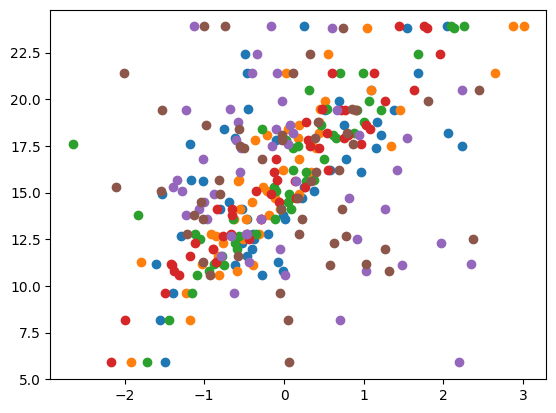

In [74]:
plt.plot(x, y,'o')
plt.show()

In [75]:
#Eliminate the insurance metrics as factor because we only want to see the correlation
#between driving factors and bad accidents
refined_driver_data = df[['speeding','alcohol','not_distracted','no_previous']].values
refined_driver_titles = ['speeding','alcohol','not_distracted','no_previous']
x_two = scale(refined_driver_data)

In [76]:
LinReg.fit(x_two,y)
print(LinReg.score(x_two,y))
print(LinReg.intercept_)
print(LinReg.coef_)

0.9561822578077731
[15.79019608]
[[-0.07098946  0.83156275  0.79297217  2.69900537]]


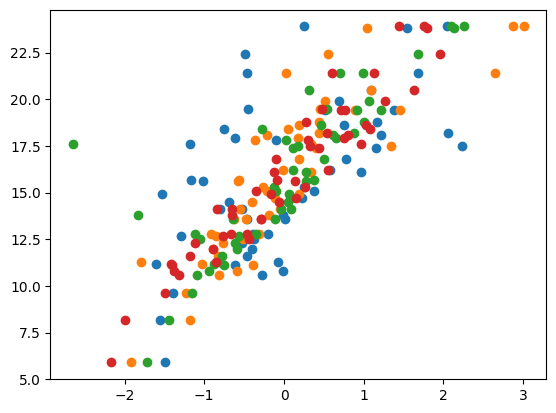

In [77]:
refined_df = pd.DataFrame(refined_driver_data, columns=refined_driver_titles)
plt.plot(x_two, y,'o')
plt.show()

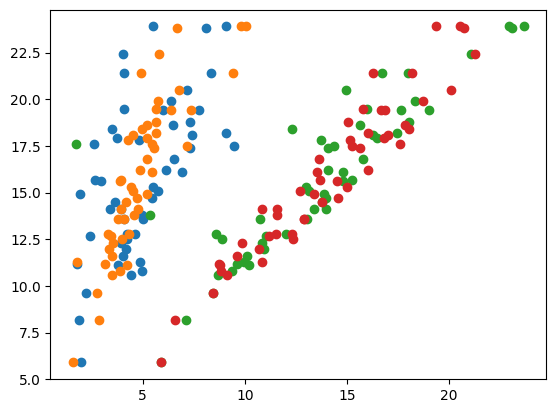

In [78]:
plt.plot(refined_df,y,'o')
plt.show()

In [79]:
refined_df.tail()

,speeding,alcohol,not_distracted,no_previous
46,2.413,3.429,11.049,11.176
47,4.452,3.498,8.692,9.116
48,8.092,6.664,23.086,20.706
49,4.968,4.554,5.382,11.592
50,7.308,5.568,14.094,15.660


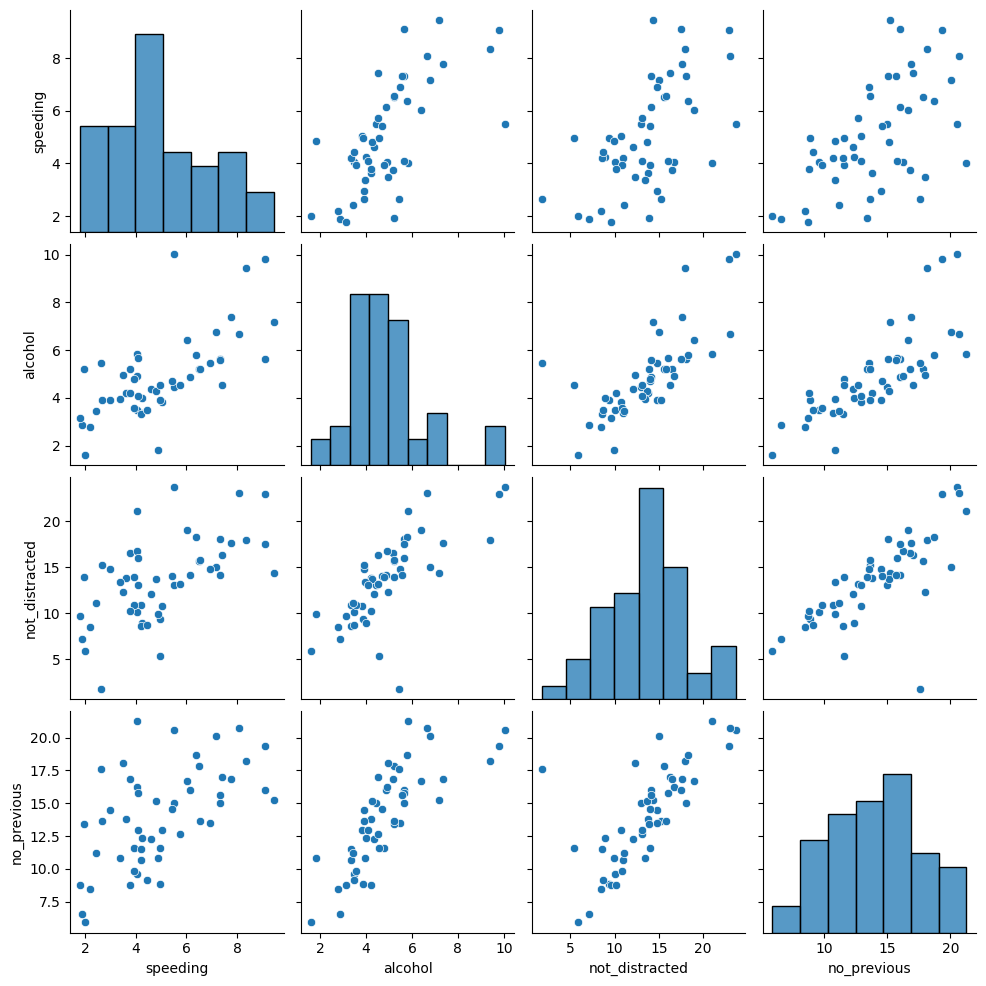

In [80]:
# Four Factor correlation
sns.pairplot(refined_df)


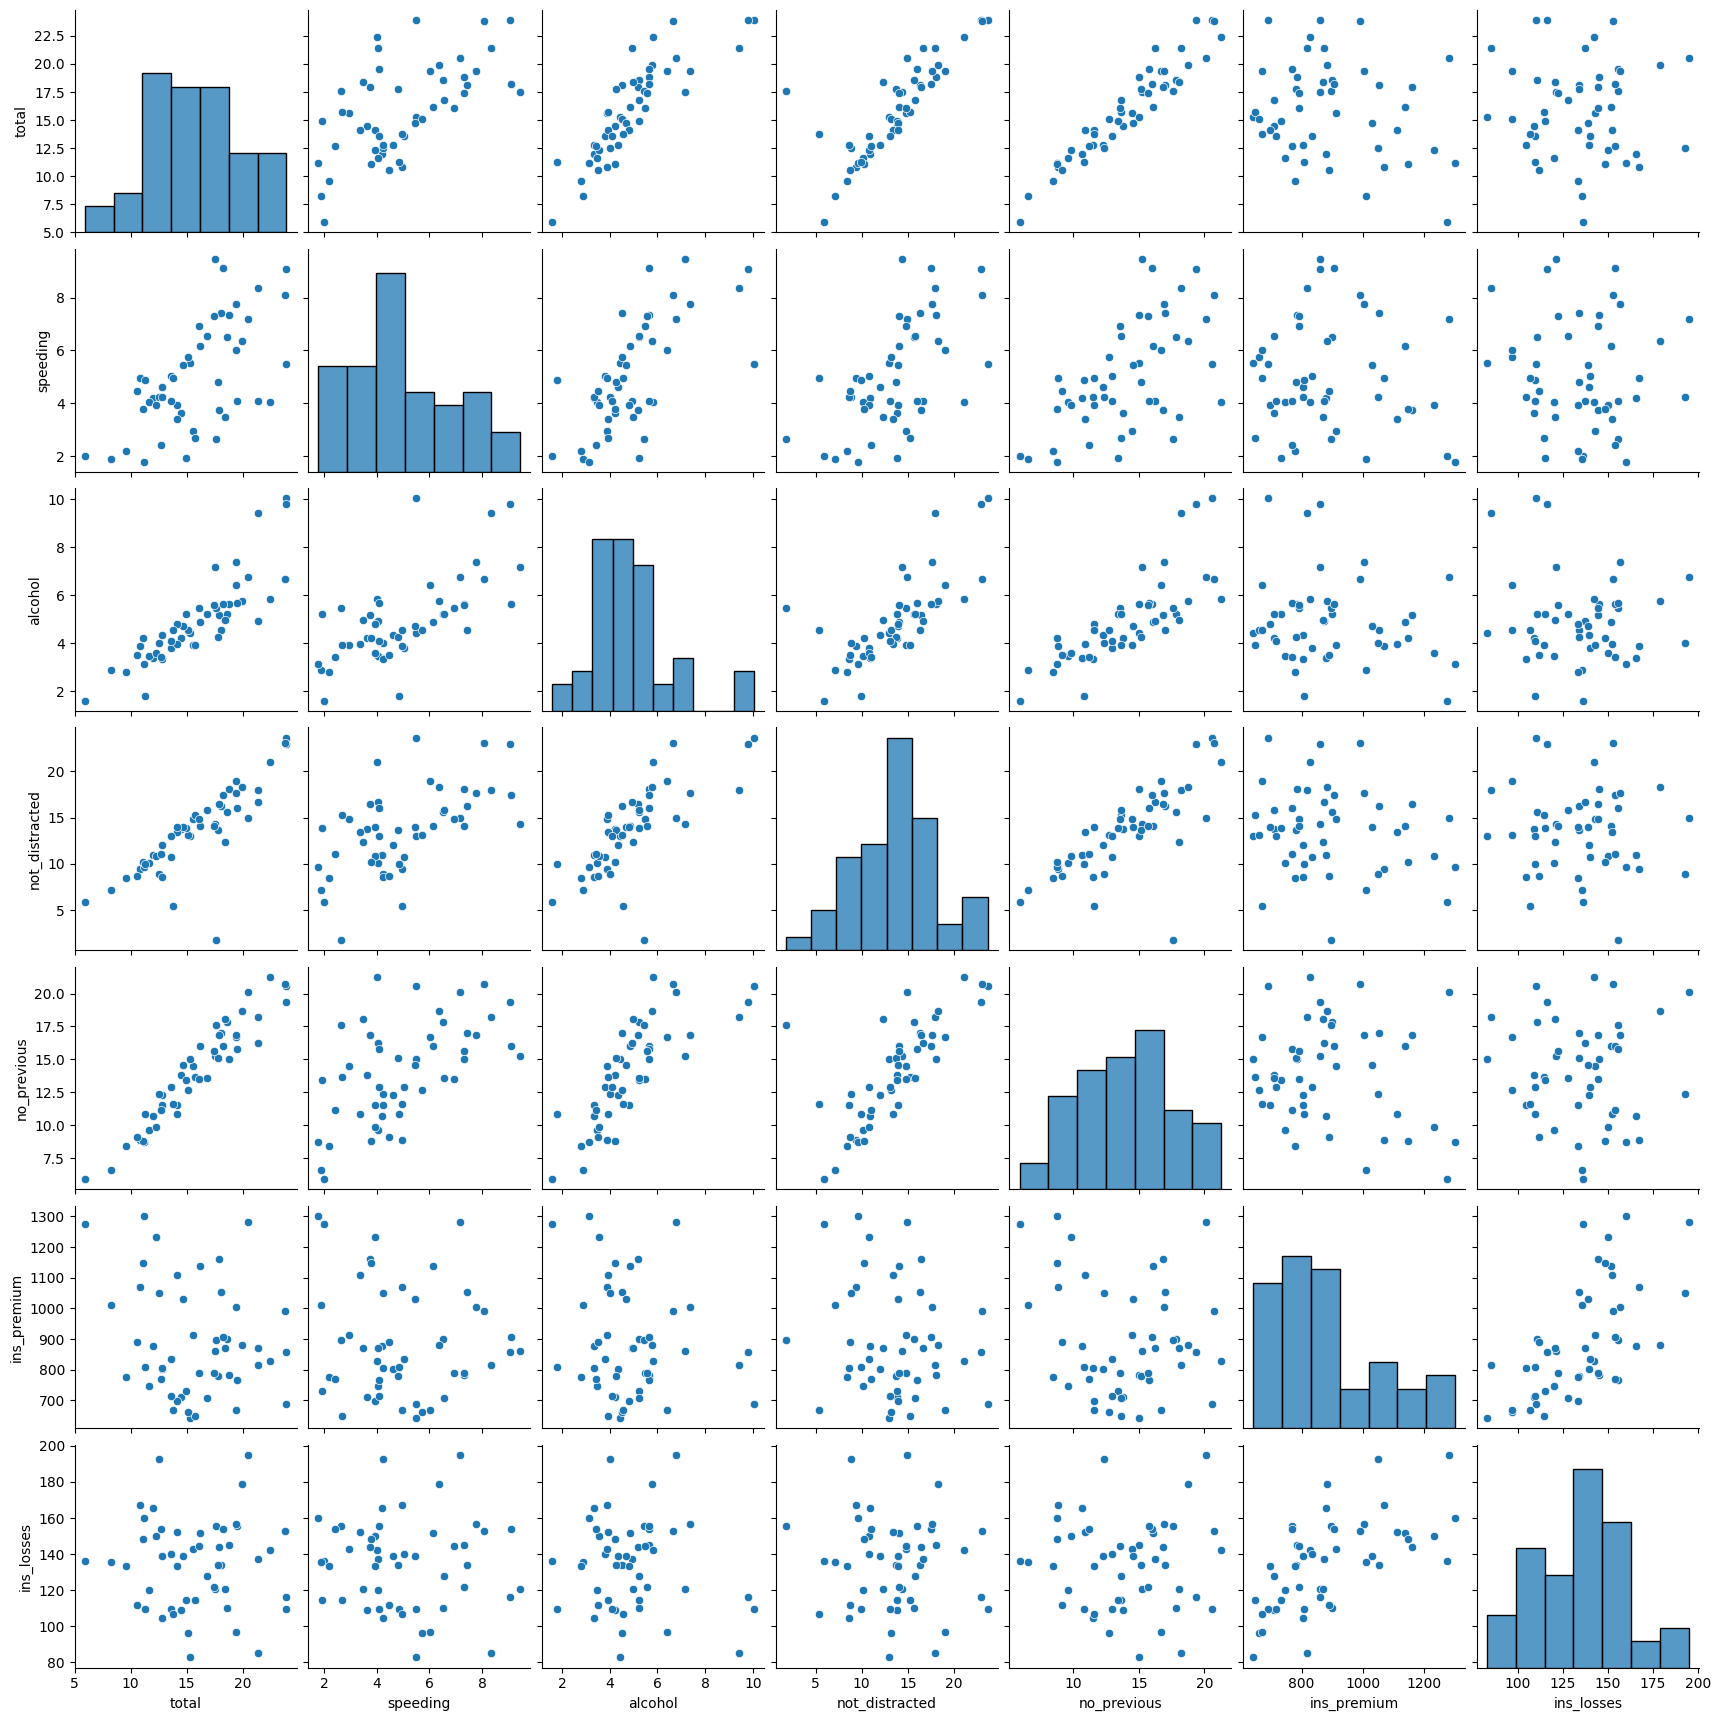

In [81]:
#six factor correlation
sns.pairplot(df)